#### Please note that all the data used in this notebook is fabricated and intended solely for illustration purposes

In [2]:
# import data munging packages
import pandas as pd
import numpy as np

# import plotting packages
import matplotlib.pyplot as plt
from matplotlib import cm

# import the package to ignore the warnings
import warnings

# ignoring the warning
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')



### Make Up Pandas Datasets for Visualization

In [5]:
# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_days = 21
test_group_avg_points = 400
control_group_reduction = 0.04  # 4% lower than test group

# Generate dates for 21 days
dates = pd.date_range(start="2025-01-10", periods=num_days, freq="D")

# Generate test group data: normally distributed around 400 with some noise
test_points = np.random.normal(loc=test_group_avg_points, scale=20, size=num_days)  # Standard deviation of 20
test_points = np.maximum(test_points, 0)  # Ensure no negative points

# Generate control group points: 4% lower than test group on average
control_points = test_points * (1 - control_group_reduction)
control_points = np.maximum(control_points, 0)  # Ensure no negative points

# Create a DataFrame
df = pd.DataFrame({
    "Date": dates,
    "Test_Group_Points_Per_User": test_points,
    "Control_Group_Points_Per_User": control_points
})

# Round the points to 2 decimal places for readability
df = df.round(2)

# Display the DataFrame
df

,Date,Test_Group_Points_Per_User,Control_Group_Points_Per_User
0,2025-01-10,409.93,393.54
1,2025-01-11,397.23,381.35
2,2025-01-12,412.95,396.44
3,2025-01-13,430.46,413.24
4,2025-01-14,395.32,379.50
5,2025-01-15,395.32,379.50
6,2025-01-16,431.58,414.32
7,2025-01-17,415.35,398.73
8,2025-01-18,390.61,374.99
9,2025-01-19,410.85,394.42


In [7]:
# Make up the data for Funnel Chart
funnel_data = {
    "Funnel Stage": [
        "Saw Credit Card Banner",
        "Clicked Sign-Up Button",
        "Submitted Application",
        "Approved for Credit Card",
        "Made First Purchase"
    ],
    "Count": [100000, 9000, 6000, 5000, 4000],
    "Conversion Rate": ["100%", "9%", "6%", "5%", "4%"]
}

# Create DataFrame
df_funnel = pd.DataFrame(funnel_data)

df_funnel

,Funnel Stage,Count,Conversion Rate
0,Saw Credit Card Banner,100000,100%
1,Clicked Sign-Up Button,9000,9%
2,Submitted Application,6000,6%
3,Approved for Credit Card,5000,5%
4,Made First Purchase,4000,4%


In [9]:
class data_visualization:
    """
    A reusable, scalable Python class for creating visually appealing line charts.
    --------------------------------------------------------------------------------------------------------------    
    __init__() :              Initializes the class.
    line_chart():             Displays a line chart comparing test and control group data points over time.
    """
    def __init__(self, df_bar, df_funnel):
        """
        Initializes the class attributes.
        -------------------------------------------
        Input: 
        - (dataframe) df:  The input dataset will be used for visualization.
        
        Output:
        No output object will be produced during initialization.
        """
        self.df_bar = df_bar
        self.df_funnel = df_funnel


    def line_chart(self, x_axis, y_axis_test, y_axis_control, label_test, label_control, ylabel, title):
        """
        Displays a visually appealing line chart comparing test and control group data points over time.
        -------------------------------------------
        Input:
        - x_axis (str): Column name for the x-axis.
        - y_axis_test (str): Column name for the test group data points.
        - y_axis_control (str): Column name for the control group data points.
        - label_test (str): Label for the test group line.
        - label_control (str): Label for the control group line.
        - ylabel (str): Label for the y-axis.
        - title (str): Title of the line chart.
        
        Output:
        - Line chart showing the trend of test and control group data points over time.
        """
        # Set the figure size and style
        plt.figure(figsize=(12, 8))
        plt.style.use('seaborn')  # Use a modern style

        # Plot the test group points
        plt.plot(self.df_bar[x_axis], self.df_bar[y_axis_test], label=label_test, marker='o', color='#1f77b4', linewidth=2, markersize=8)

        # Plot the control group points
        plt.plot(self.df_bar[x_axis], self.df_bar[y_axis_control], label=label_control, marker='s', color='#ff7f0e', linewidth=2, markersize=8)

        # Add title and labels
        plt.title(title, fontsize=16, fontweight='bold', pad=20)
        plt.xlabel(x_axis, fontsize=14, labelpad=10)
        plt.ylabel(ylabel, fontsize=14, labelpad=10)

        # Add grid lines for better readability
        plt.grid(True, linestyle='--', alpha=0.6)

        # Add a legend with a shadow and custom location
        plt.legend(frameon=True, shadow=True, loc='upper right', fontsize=12)

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)

        # Add annotations for the maximum and minimum points
        max_test = self.df_bar[y_axis_test].max()
        min_test = self.df_bar[y_axis_test].min()
        max_control = self.df_bar[y_axis_control].max()
        min_control = self.df_bar[y_axis_control].min()

        # Annotate max and min for test group
        plt.annotate(f'Max: {max_test:.2f}', 
                     xy=(self.df_bar[x_axis][self.df_bar[y_axis_test].idxmax()], max_test), 
                     xytext=(10, 10), textcoords='offset points', fontsize=12, color='#1f77b4',
                     arrowprops=dict(arrowstyle='->', color='#1f77b4'))
        plt.annotate(f'Min: {min_test:.2f}', 
                     xy=(self.df_bar[x_axis][self.df_bar[y_axis_test].idxmin()], min_test), 
                     xytext=(10, -20), textcoords='offset points', fontsize=12, color='#1f77b4',
                     arrowprops=dict(arrowstyle='->', color='#1f77b4'))

        # Annotate max and min for control group
        plt.annotate(f'Max: {max_control:.2f}', 
                     xy=(self.df_bar[x_axis][self.df_bar[y_axis_control].idxmax()], max_control), 
                     xytext=(10, 10), textcoords='offset points', fontsize=12, color='#ff7f0e',
                     arrowprops=dict(arrowstyle='->', color='#ff7f0e'))
        plt.annotate(f'Min: {min_control:.2f}', 
                     xy=(self.df_bar[x_axis][self.df_bar[y_axis_control].idxmin()], min_control), 
                     xytext=(10, -20), textcoords='offset points', fontsize=12, color='#ff7f0e',
                     arrowprops=dict(arrowstyle='->', color='#ff7f0e'))

        # Add padding for better layout
        plt.tight_layout()

        # Display the plot
        plt.show()

        # Close the plot
        plt.close()

    def funnel_chart(self, stage_col, count_col, conversion_col, title, color_scheme):
        """
        Displays a funnel visualization.
        -------------------------------------------
        Input:
        - stage_col: Column name for funnel stages
        - count_col: Column name for user counts
        - conversion_col: Column name for conversion rates
        - title: Chart title
        - color_scheme: Matplotlib colormap for visualization

        Output:
        - Funnel bar chart for test group data points.
        """
        plt.figure(figsize=(12, 6))
        plt.style.use('seaborn')
        
        # Prepare data
        funnel = self.df_funnel.sort_values(by=count_col, ascending=False)
        funnel = funnel.reset_index(drop=True)
        
        # Create color gradient
        colors = color_scheme(np.linspace(0.3, 1, len(funnel)))
        
        # Plot horizontal bars
        bars = plt.barh(funnel[stage_col], funnel[count_col], color=colors)
        
        # Annotate bars
        for i, (stage, count, conv) in enumerate(zip(funnel[stage_col], 
                                                   funnel[count_col], 
                                                   funnel[conversion_col])):
            # Main annotation
            plt.text(count/2, i, 
                     f"{count:,}\n({conv})", 
                     va='center', ha='center', 
                     color='white', fontsize=10, fontweight='bold')


        # Styling
        plt.title(title, fontsize=18, pad=20, fontweight='bold')
        plt.xlabel('Number of Users', fontsize=14, labelpad=10)
        plt.ylabel('Funnel Stage', fontsize=14, labelpad=10)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.gca().invert_yaxis()
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        plt.close()



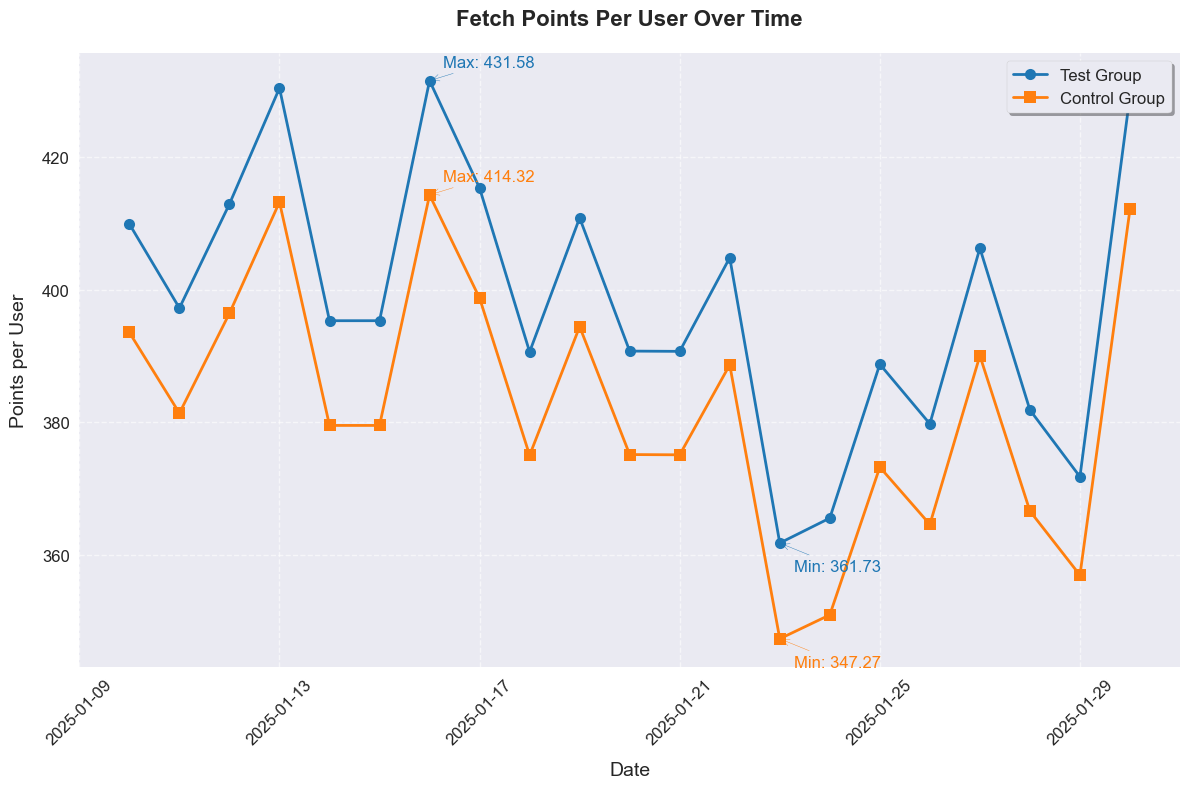

In [11]:
viz = data_visualization(df, df_funnel)

# Generate the line chart
viz.line_chart(
    x_axis="Date",
    y_axis_test="Test_Group_Points_Per_User",
    y_axis_control="Control_Group_Points_Per_User",
    label_test="Test Group",
    label_control="Control Group",
    ylabel="Points per User",
    title="Fetch Points Per User Over Time"
)

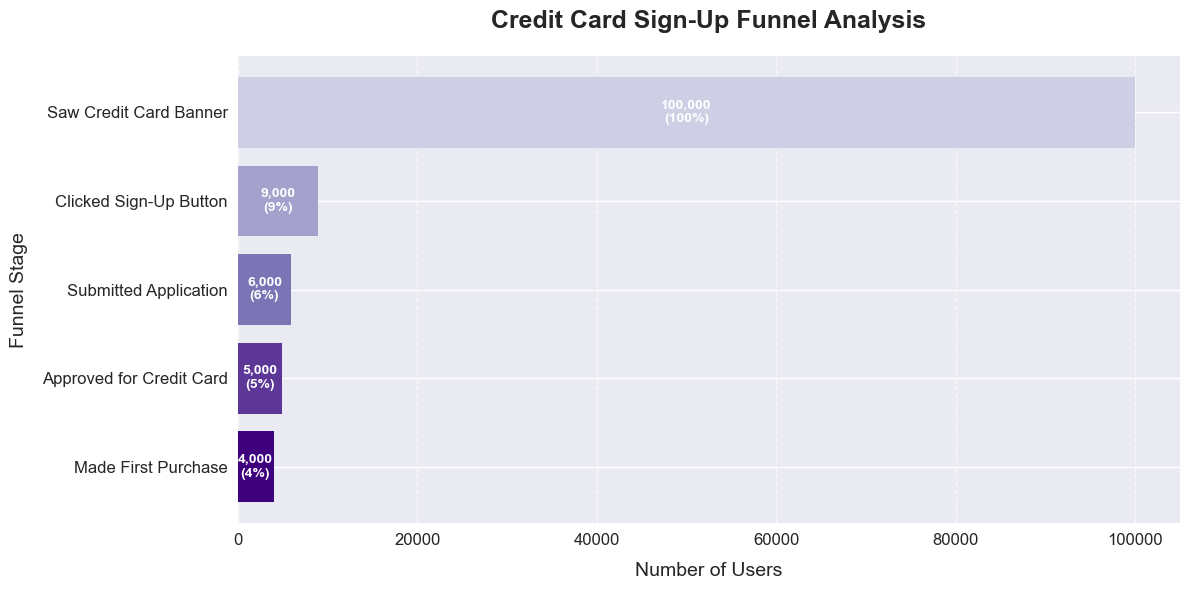

In [13]:
# Generate the Funnel Chart
viz.funnel_chart(
    stage_col="Funnel Stage",
    count_col="Count",
    conversion_col="Conversion Rate",
    title="Credit Card Sign-Up Funnel Analysis",
    color_scheme=cm.Purples
)